In [120]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [121]:
data = pd.read_csv('../data/updated_dataset_cor.csv')
data.head()

,id,location name,lat,lon,experience,Unnamed: 5,police_station_nearby,is_crowdy,crime_records_severe,safety_level
0,1,Peshwe Udyan Zoo,18.503622,73.851932,Scenic and tranquil,NaN,False,True,False,3
1,2,Shinde Chhatri,18.491631,73.897270,Very spiritual and peaceful,NaN,False,True,False,1
2,3,Rajiv Gandhi Zoological Park,18.452488,73.860802,Developing area,NaN,True,True,False,3
3,4,Empress Garden,49.149236,-123.136103,Rich historical significance,NaN,True,False,True,3
4,5,Saras Baug,19.044267,72.914934,Amazing variety of animals,NaN,False,False,False,2


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   location name          2000 non-null   object 
 2   lat                    2000 non-null   float64
 3   lon                    2000 non-null   float64
 4   experience             2000 non-null   object 
 5   Unnamed: 5             0 non-null      float64
 6   police_station_nearby  2000 non-null   bool   
 7   is_crowdy              2000 non-null   bool   
 8   crime_records_severe   2000 non-null   bool   
 9   safety_level           2000 non-null   int64  
dtypes: bool(3), float64(3), int64(2), object(2)
memory usage: 115.4+ KB


In [123]:
data.drop(columns=['id', 'Unnamed: 5'], inplace=True)
data.sample(5)

,location name,lat,lon,experience,police_station_nearby,is_crowdy,crime_records_severe,safety_level
905,Laxmi Road,18.515670,73.869941,Very spiritual and peaceful,True,True,True,3
273,Baner Pashan Biodiversity Park,18.547779,73.783333,Great for shopping,True,True,True,3
418,Kamala Nehru Park,18.955020,72.805063,Rich historical significance,False,False,True,2
1121,Hinjewadi,18.592179,73.684116,Safe and quiet,False,True,True,2
988,Laxmi Road,18.515670,73.869941,Family-friendly,True,True,False,5


In [124]:
# prolice station nearby can be encoded in 0 and 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location name          2000 non-null   object 
 1   lat                    2000 non-null   float64
 2   lon                    2000 non-null   float64
 3   experience             2000 non-null   object 
 4   police_station_nearby  2000 non-null   bool   
 5   is_crowdy              2000 non-null   bool   
 6   crime_records_severe   2000 non-null   bool   
 7   safety_level           2000 non-null   int64  
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 84.1+ KB


In [125]:
encoder = LabelEncoder()

In [126]:
data['police_station_nearby'] = encoder.fit_transform(data['police_station_nearby'])
data['is_crowdy'] = encoder.fit_transform(data['is_crowdy'])
data['crime_records_severe'] = encoder.fit_transform(data['crime_records_severe'])
data['location name'] = encoder.fit_transform(data['location name'])
data['experience'] = encoder.fit_transform(data['experience'])

In [127]:
data.sample(10)

,location name,lat,lon,experience,police_station_nearby,is_crowdy,crime_records_severe,safety_level
1389,15,18.592179,73.684116,3,0,1,0,2
545,17,18.955020,72.805063,6,1,0,1,1
1591,50,18.602249,73.764445,4,1,0,1,1
1641,2,18.564243,73.776857,7,1,0,0,5
772,6,18.540593,73.883439,1,0,1,0,3
1528,15,18.592179,73.684116,8,1,0,1,5
1147,15,18.592179,73.684116,5,1,0,1,5
330,36,18.510767,73.854442,1,0,1,0,4
88,17,18.955020,72.805063,2,0,1,1,5
1429,4,18.520954,73.778087,14,0,0,0,1


In [128]:
data.describe()

,location name,lat,lon,experience,police_station_nearby,is_crowdy,crime_records_severe,safety_level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000
mean,25.241500,20.490891,66.110743,7.050500,0.5050,0.500000,0.486000,2.966000
std,15.257902,6.740250,35.372532,4.727063,0.5001,0.500125,0.499929,1.439055
min,0.000000,17.446757,-123.136103,0.000000,0.0000,0.000000,0.000000,1.000000
25%,12.000000,18.503622,73.783333,3.000000,0.0000,0.000000,0.000000,2.000000
50%,25.000000,18.526946,73.851932,6.000000,1.0000,0.500000,0.000000,3.000000
75%,39.000000,18.565632,73.886576,11.000000,1.0000,1.000000,1.000000,4.000000
max,51.000000,53.461461,86.039850,15.000000,1.0000,1.000000,1.000000,5.000000


### Adding Polynomial Features

In [129]:

from sklearn.preprocessing import PolynomialFeatures

# Interaction Features
data['experience_police_interaction'] = data['experience'] * data['police_station_nearby']
data['crowdy_crime_interaction'] = data['is_crowdy'] * data['crime_records_severe']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['experience', 'lat', 'lon']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['experience', 'lat', 'lon']))

# Combine with original data
data = pd.concat([data, poly_df], axis=1)


In [130]:
data.apply(pd.Series.nunique)

location name                     52
lat                               51
lon                               51
experience                        16
police_station_nearby              2
is_crowdy                          2
crime_records_severe               2
safety_level                       5
experience_police_interaction     16
crowdy_crime_interaction           2
experience                        16
lat                               51
lon                               51
experience^2                      16
experience lat                   469
experience lon                   469
lat^2                             51
lat lon                           51
lon^2                             51
dtype: int64

In [131]:
data['crime_records_severe'].corr(data['safety_level'])

np.float64(0.015331007745039451)

<Axes: xlabel='safety_level', ylabel='Count'>

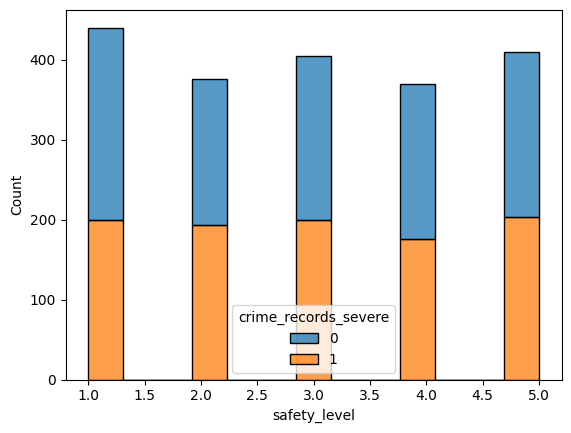

In [132]:
sns.histplot(data=data, x='safety_level', hue='crime_records_severe', multiple='stack')

In [133]:
data.columns

Index(['location name', 'lat', 'lon', 'experience', 'police_station_nearby',
       'is_crowdy', 'crime_records_severe', 'safety_level',
       'experience_police_interaction', 'crowdy_crime_interaction',
       'experience', 'lat', 'lon', 'experience^2', 'experience lat',
       'experience lon', 'lat^2', 'lat lon', 'lon^2'],
      dtype='object')

<Axes: xlabel='safety_level'>

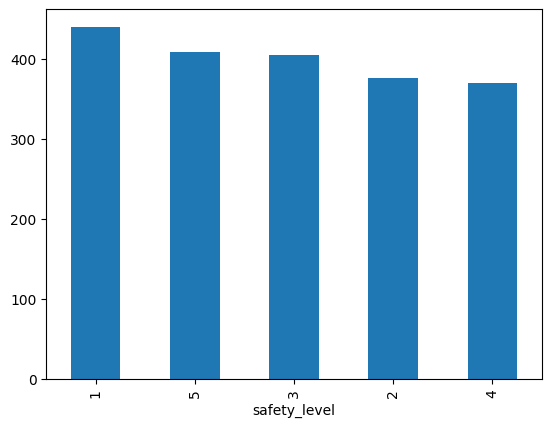

In [134]:
data['safety_level'].value_counts().plot(kind='bar')

### Data visualisation plots against original features

In [135]:
data_visualization = data[['safety_level', 'crime_records_severe', 'location name', 'experience', 'is_crowdy', 'lat', 'lon']]
sns.pairplot(data_visualization, hue='safety_level', diag_kind='kde')
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (2000, 2) instead

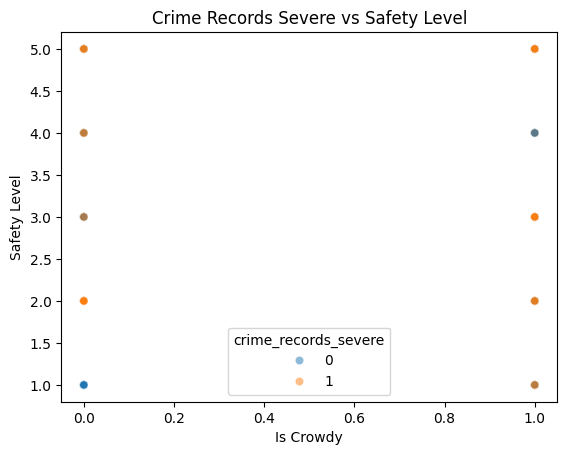

In [136]:
sns.scatterplot(data=data, x='is_crowdy', y='safety_level', hue='crime_records_severe', alpha=0.5)
plt.title('Crime Records Severe vs Safety Level')
plt.xlabel('Is Crowdy')
plt.ylabel('Safety Level')
plt.show()


In [137]:
X, y = data.drop(columns=['safety_level']), data[['safety_level']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 18), (400, 18), (1600, 1), (400, 1))

In [138]:
X.columns

Index(['location name', 'lat', 'lon', 'experience', 'police_station_nearby',
       'is_crowdy', 'crime_records_severe', 'experience_police_interaction',
       'crowdy_crime_interaction', 'experience', 'lat', 'lon', 'experience^2',
       'experience lat', 'experience lon', 'lat^2', 'lat lon', 'lon^2'],
      dtype='object')

## Using SMOTE method for balancing given data

c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataCon

Random Forest Accuracy: 20.00%
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.20      0.20        88
           2       0.17      0.19      0.18        75
           3       0.18      0.17      0.18        81
           4       0.18      0.18      0.18        74
           5       0.26      0.26      0.26        82

    accuracy                           0.20       400
   macro avg       0.20      0.20      0.20       400
weighted avg       0.20      0.20      0.20       400



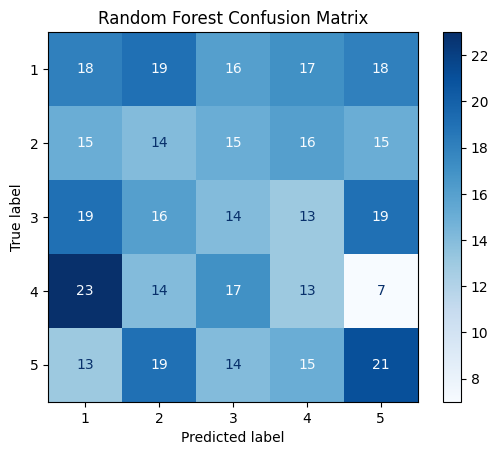

In [139]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Make predictions
y_pred_rf = grid_search.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [140]:
y_pred_rf, X_test

(array([3, 5, 2, 5, 5, 5, 4, 5, 2, 4, 4, 4, 2, 4, 2, 5, 1, 1, 3, 1, 2, 3,
        1, 2, 2, 3, 5, 4, 5, 5, 4, 3, 1, 4, 4, 3, 4, 1, 1, 1, 2, 4, 2, 3,
        1, 2, 3, 3, 4, 2, 2, 2, 2, 5, 2, 5, 2, 5, 2, 3, 2, 5, 3, 2, 5, 1,
        2, 5, 3, 1, 2, 2, 2, 3, 5, 1, 4, 2, 4, 3, 2, 3, 1, 1, 5, 4, 4, 5,
        5, 4, 3, 3, 4, 3, 4, 2, 3, 2, 1, 2, 1, 5, 4, 4, 5, 2, 1, 4, 1, 2,
        4, 4, 5, 5, 4, 1, 1, 1, 1, 4, 4, 3, 4, 3, 2, 4, 1, 5, 4, 2, 3, 3,
        1, 4, 3, 3, 5, 5, 2, 5, 4, 3, 5, 4, 5, 3, 3, 4, 3, 2, 3, 3, 1, 1,
        2, 4, 4, 1, 5, 5, 2, 1, 1, 1, 2, 1, 2, 4, 3, 1, 1, 1, 1, 4, 4, 3,
        1, 2, 4, 3, 3, 5, 1, 5, 1, 4, 2, 3, 5, 2, 2, 1, 3, 1, 5, 1, 1, 5,
        5, 1, 2, 3, 3, 3, 1, 3, 2, 1, 4, 4, 2, 5, 2, 3, 2, 4, 2, 1, 1, 4,
        3, 5, 1, 5, 3, 1, 3, 5, 5, 4, 2, 4, 3, 2, 5, 1, 4, 3, 3, 3, 5, 2,
        1, 1, 2, 2, 5, 4, 3, 3, 3, 5, 1, 2, 1, 1, 3, 2, 3, 1, 5, 5, 5, 4,
        2, 5, 1, 4, 5, 5, 1, 4, 3, 2, 2, 3, 2, 1, 5, 5, 1, 2, 5, 2, 1, 4,
        4, 4, 5, 3, 3, 5, 5, 1, 2, 1, 

In [141]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

# Define the pipeline
pipeline = ImbPipeline([
    ('feature Encoding', LabelEncoder()), # step 1: feature encoding
    ('smote', SMOTE(random_state=42)),  # Step 2: Balance the dataset    
    ('model', RandomForestClassifier(random_state=42))  # Step 3: Random Forest model
])

# Define hyperparameters for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Perform GridSearchCV with the pipeline
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Save the best pipeline
joblib.dump(grid_search.best_estimator_, '../data/random_forest_pipeline.pkl')
print("Pipeline with Random Forest saved successfully!")

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 430, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\KK9345\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 1383, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given


In [ ]:
categorical_columns = ['location name', 'experience', 'is_crowdy', 'police_station_nearby', 'crime_records_severe']

# Create and fit encoders for categorical columns
encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = encoders[col].fit_transform(data[col])

# Save the encoders
joblib.dump(encoders, '../data/encoders.pkl')
print("Encoders saved successfully!")

ValueError: y should be a 1d array, got an array of shape (2000, 2) instead.